In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [2]:
def parse_log(filename):
    if not os.path.exists(filename):
        return None, None
    with open(filename, 'r') as f:
        l = f.readline()
        if len(l) < 2:
            return None, None
        meantime = float(l.split('mean = ')[1].split(' ms')[0])
        geps = float(l.split('GEPs = ')[1])
    return meantime, geps

In [3]:
ns = list(range(8, 16))
algos = ['smart_recr', 'lex', 'sjt']
optims = ['simple', 'mpi_simd', 'gpu']
algo_names = dict(smart_recr='Heap', lex='Lex', sjt='SJT')
optim_names = dict(simple='CPU Simple', mpi_simd='CPU MPI + SIMD', gpu='GPU')

In [4]:
results = dict()
for n in ns:
    for algo in algos:
        for optim in optims:
            filename = '../../build/logs/l_{}_algo_{}_{}.log'.format(n, algo, optim)
            data = parse_log(filename)
            results[n, algo, optim] = data

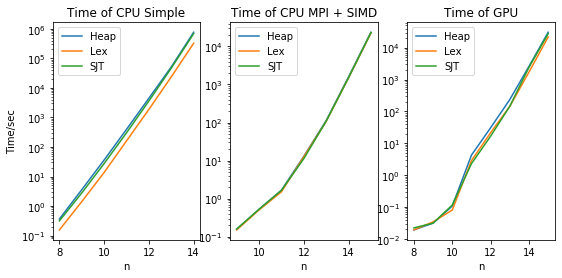

In [5]:
# Time of algos figure
fig, axs = plt.subplots(1, len(algos))
fig.set_size_inches(9, 4)

for optim, ax in zip(optims, axs):
    datas = dict()
    for algo in algos:
        datas[optim] = []
        for n in ns:
            datas[optim].append(results[n, algo, optim][0])
        ax.plot(ns, datas[optim], label=algo_names[algo])
    ax.set_title('Time of {}'.format(optim_names[optim]))
    ax.legend()
    ax.set_yscale('log')
    
    ax.set_xlabel('n')
axs[0].set_ylabel('Time/sec')
fig.savefig('time_of_algos.pdf')

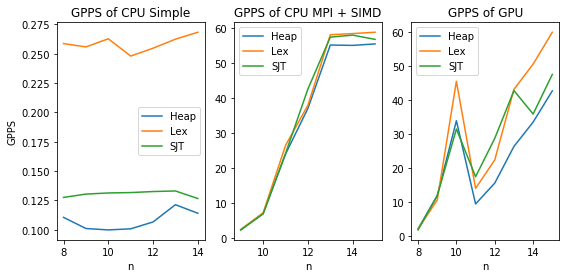

In [6]:
# GEPs of algos figure
fig, axs = plt.subplots(1, len(algos))
fig.set_size_inches(9, 4)
axs[0].set_ylabel('GPPS')
for optim, ax in zip(optims, axs):
    datas = dict()
    for algo in algos:
        datas[optim] = []
        for n in ns:
            geps = results[n, algo, optim][1]
            if geps is not None:
                geps /= float(n)
            datas[optim].append(geps)
        ax.plot(ns, datas[optim], label=algo_names[algo])
    ax.set_title('GPPS of {}'.format(optim_names[optim]))
    ax.legend()
    ax.set_xlabel('n')
    
fig.savefig('gpps_of_algos.pdf')

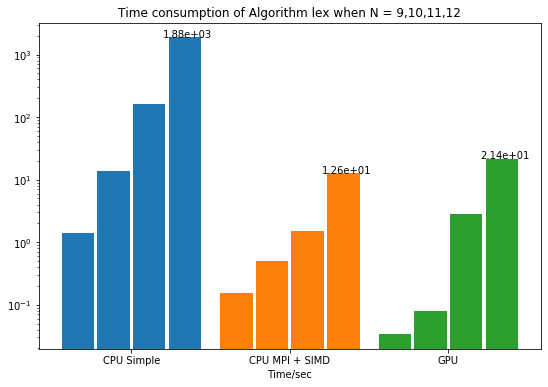

In [7]:
# Speedup figure
fig, ax = plt.subplots()
fig.set_size_inches(9, 6)
algo = 'lex'

for i, optim in enumerate(optims):
    n = range(9, 13)
    width = 0.9 / len(n)
    xs = [i - width * (len(n) - 1) * .5 + (j - 9) * width for j in n]
    ys = [results[j, algo, optim][0] for j in n]
    ax.bar(xs, ys, width=width - 0.02)
    ax.text(xs[-1] - width * .6, ys[-1] + 0.1, '{:.2e}'.format(ys[-1]))
    
xs = np.arange(len(optims))
xlabels = [optim_names[optim] for optim in optims]
ax.set_xticks(xs)
ax.set_xticklabels(xlabels)
ax.set_yscale('log')

ax.set_title('Time consumption of Algorithm {} when N = {}'.format(algo, ','.join(map(str, n))))

ax.set_xlabel('Time/sec')

fig.savefig('speedup.pdf')